<a href="https://colab.research.google.com/github/angiemelo/angiemelo/blob/main/Digdata_NHS_python_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







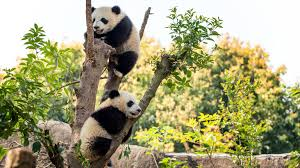


In [ ]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [ ]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 2.15 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [ ]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [ ]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [ ]:
pca_regional_drug_summary_df[['BNF_CHEMICAL_SUBSTANCE', 'ITEMS']].groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False).sum().sort_values(by='ITEMS', ascending=False).head(10)

,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [ ]:
pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine'].groupby('YEAR_MONTH', as_index=False)['COST'].sum()

,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [ ]:
pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'MIDLANDS')].groupby('YEAR', as_index=False)['COST'].sum()

,YEAR,COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

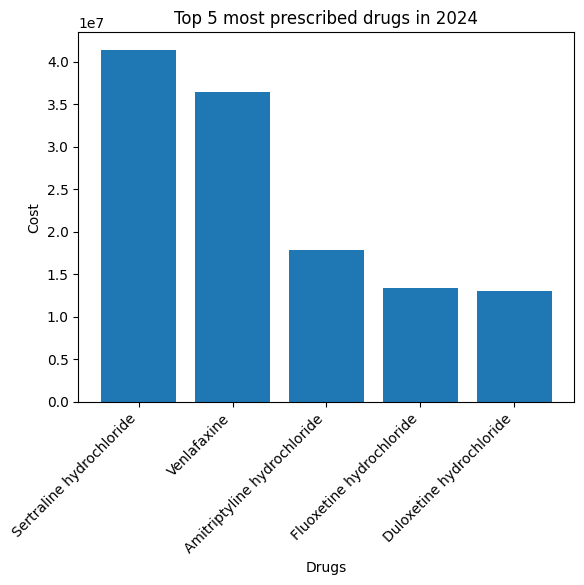

In [ ]:
import matplotlib.pyplot as plt

# dataset for 2024
ds = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]

top5 = ds.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum().sort_values(by='COST', ascending=False).head(5)

categories = top5['BNF_CHEMICAL_SUBSTANCE']
values = top5['COST']
plt.bar(categories, values)
plt.title("Top 5 most prescribed drugs in 2024")
plt.xlabel("Drugs")
plt.ylabel("Cost")
plt.xticks(rotation=45, ha='right')
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


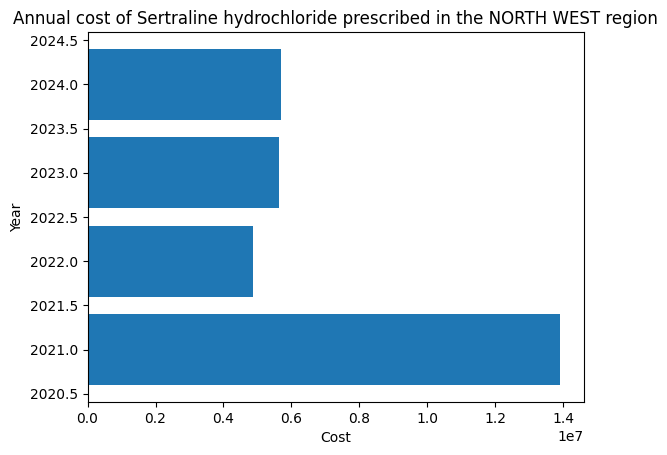

In [ ]:
sertalineNW = pca_regional_drug_summary_df[(pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'NORTH WEST')]

sertalineNW = sertalineNW.groupby('YEAR', as_index=False)['COST'].sum()

categories = sertalineNW['YEAR']
values = sertalineNW['COST']
plt.barh(categories, values)
plt.title("Annual cost of Sertraline hydrochloride prescribed in the NORTH WEST region")
plt.xlabel("Cost")
plt.ylabel("Year")
plt.show()







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

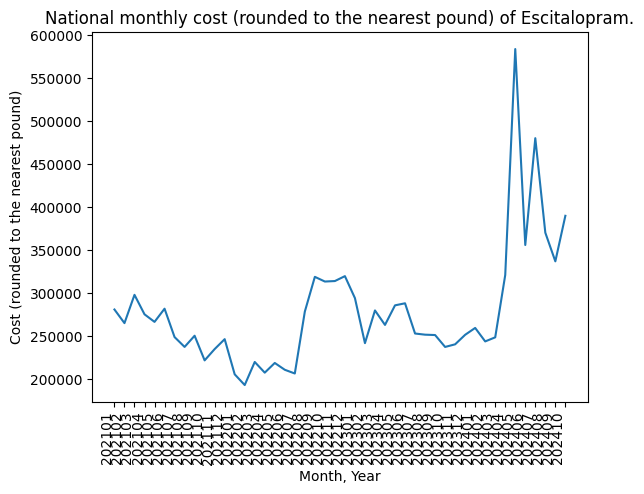

In [ ]:
escitalopram = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram'].copy()
escitalopram['YEAR_MONTH'] = escitalopram['YEAR_MONTH'].astype(str)
escitalopramMC = escitalopram.groupby(escitalopram['YEAR_MONTH'], as_index=False)['COST'].sum().round()

x = escitalopramMC['YEAR_MONTH']
y = escitalopramMC['COST']
plt.plot(x, y)
plt.title("National monthly cost (rounded to the nearest pound) of Escitalopram.")
plt.xlabel("Month, Year")
plt.ylabel("Cost (rounded to the nearest pound)")
plt.xticks(rotation=90, ha='right')
plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

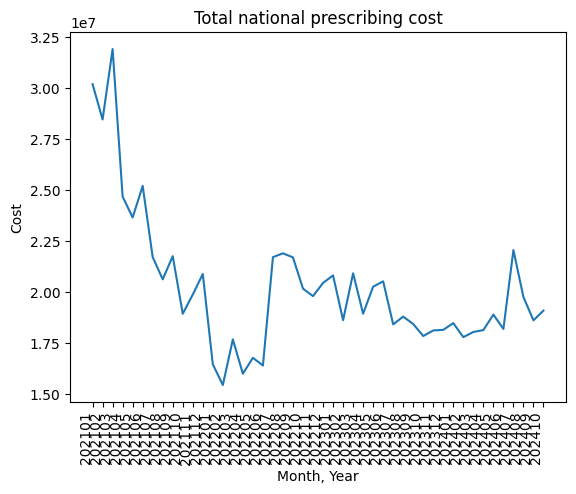

In [ ]:
ds = pca_regional_drug_summary_df[['YEAR_MONTH', 'COST']].copy()
ds['YEAR_MONTH'] = ds['YEAR_MONTH'].astype(str)

national_monthly_cost = ds.pivot_table(index='YEAR_MONTH', values='COST', aggfunc='sum')

x = national_monthly_cost.index
y = national_monthly_cost['COST']
plt.plot(x, y)
plt.title("Total national prescribing cost")
plt.xlabel("Month, Year")
plt.ylabel("Cost")
plt.xticks(rotation=90, ha='right')
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [ ]:
ds = pca_regional_drug_summary_df[['YEAR', 'COST']].groupby('YEAR')['COST'].describe().copy()

annual_summary = ds[['min', '25%', '50%', '75%', 'max']]
annual_summary.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

print(annual_summary)

        Min        Q1    Median         Q3         Max
YEAR                                                  
2021   1.10  7647.750  37209.39  108106.39  2721513.20
2022   1.51  6859.040  36545.00  108977.22   829847.10
2023  19.75  6294.680  36175.78  112120.77   762322.27
2024  12.56  5700.365  34090.06  112958.97  1163947.56



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)



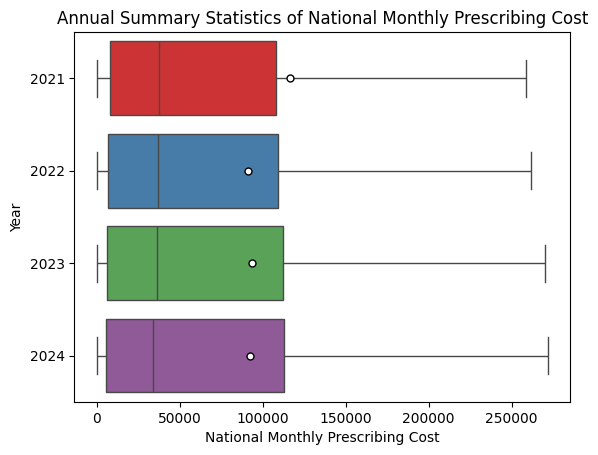

In [ ]:
import seaborn as sns

annual_summary_melted = annual_summary.reset_index().melt(id_vars='YEAR', var_name='Statistic', value_name='Cost')

sns.boxplot(x='COST', y='YEAR', data=pca_regional_drug_summary_df, showfliers=False, showmeans=True, orient='h',
            hue='YEAR', legend=False, palette='Set1', meanprops={'marker':'o',
                                                                 'markerfacecolor':'white',
                                                                 'markersize':'5',
                                                                 'markeredgecolor':'black'})

plt.title("Annual Summary Statistics of National Monthly Prescribing Cost")
plt.ylabel("Year")
plt.xlabel("National Monthly Prescribing Cost")

plt.show()

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

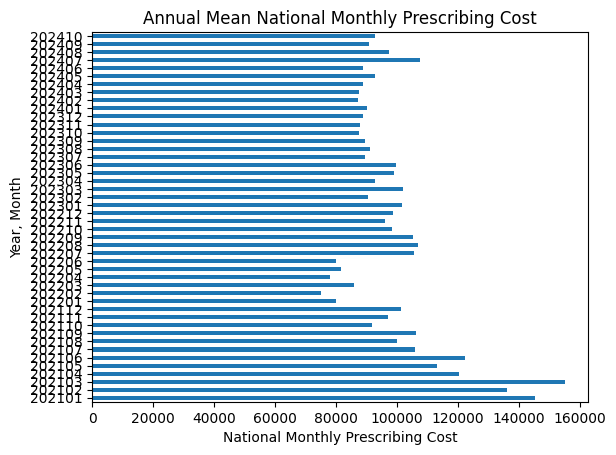

In [ ]:
annual_mean_monthly = pca_regional_drug_summary_df[['YEAR_MONTH', 'COST']].groupby('YEAR_MONTH')['COST'].mean()

annual_mean_monthly.plot(kind='barh')
plt.title("Annual Mean National Monthly Prescribing Cost")
plt.ylabel("Year, Month")
plt.xlabel("National Monthly Prescribing Cost")
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [ ]:
cost_region_year = pca_regional_drug_summary_df

cost_region_year.pivot_table(values='COST', index='YEAR',
                             columns='REGION_NAME', aggfunc='sum')

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

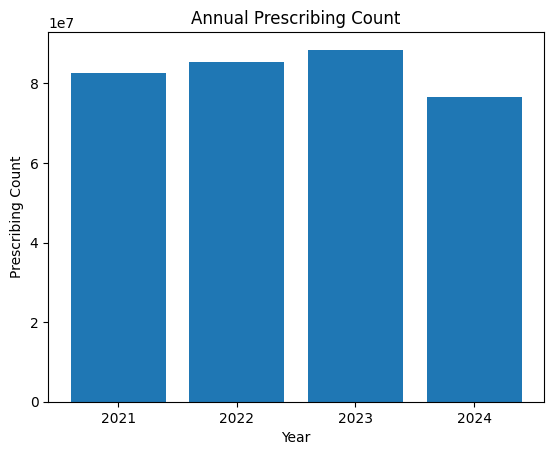

In [ ]:
annual_count = pca_regional_drug_summary_df[['YEAR', 'ITEMS']].groupby('YEAR')['ITEMS'].sum()
x = annual_count.index
y = annual_count.values
plt.bar(x, y)
plt.title('Annual Prescribing Count')
plt.xlabel('Year')
plt.ylabel('Prescribing Count')
plt.xticks(ticks=x, labels=['2021', '2022', '2023', '2024'])
plt.show()

An analysis of the Annual Prescribing Count reveals a slight upward trend in antidepressant prescriptions between 2021 and 2023. However, this trend was disrupted in 2024, where a significant decline occurred compared with the previous year. The number of items prescribed in 2024 has reached its lowest recorded level nationally, according to the provided data.

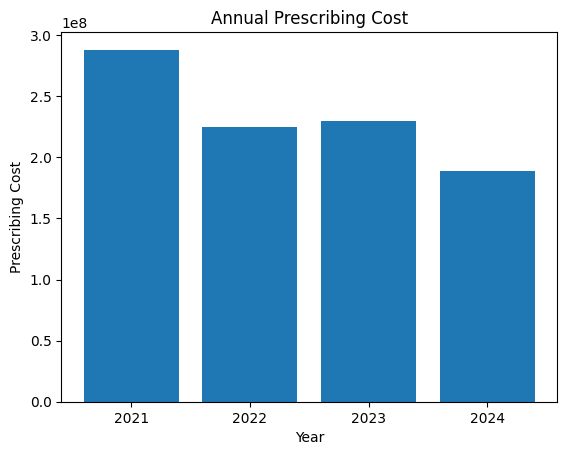

In [ ]:
annual_cost = pca_regional_drug_summary_df[['YEAR', 'COST']].groupby('YEAR')['COST'].sum()
x = annual_cost.index
y = annual_cost.values
plt.bar(x, y)
plt.title('Annual Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Prescribing Cost')
plt.xticks(ticks=x, labels=['2021', '2022', '2023', '2024'])
plt.show()

Turning to the Annual Prescribing Cost, the cost of antidepressants peaked in 2021, representing the highest recorded cost. A sharp decline followed in 2022, marking a notable reduction in costs. While 2023 saw a very small increase in costs, this was short-lived, as 2024 experienced a more pronounced decrease, culminating in the lowest recorded of antidepressant costs.

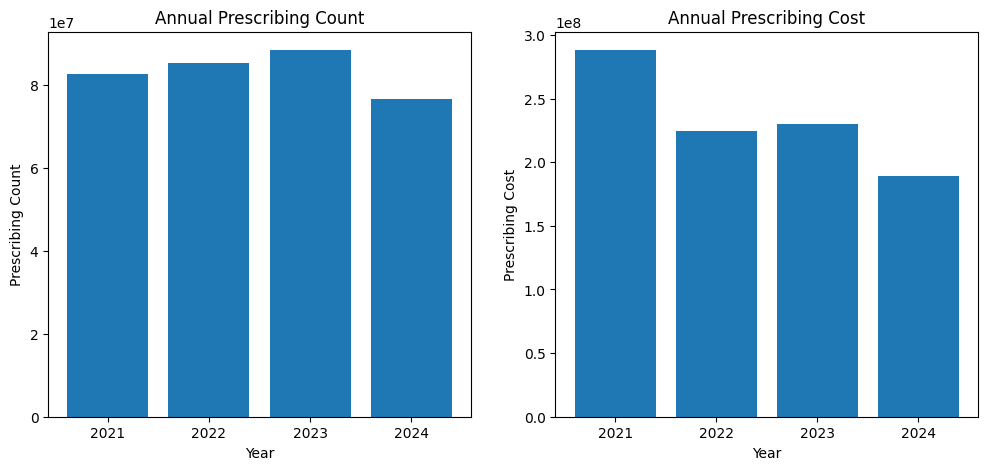

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Annual count ax1
ax1.bar(annual_count.index, annual_count.values)
ax1.set_title('Annual Prescribing Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prescribing Count')
ax1.set_xticks(ticks=x, labels=['2021', '2022', '2023', '2024'])

# Annual cost ax2
ax2.bar(annual_cost.index, annual_cost.values)
ax2.set_title('Annual Prescribing Cost')
ax2.set_xlabel('Year')
ax2.set_ylabel('Prescribing Cost')
ax2.set_xticks(ticks=x, labels=['2021', '2022', '2023', '2024'])

plt.show()

When comparing these trends across both charts, a distinct discrepancy emerges in 2022. The year 2021 shows a direct correlation between prescription volumes and costs, suggesting that higher prescription numbers lead to higher costs. However, this relationship falters in 2022. Despite a slight increase in prescription numbers compared to 2021, the costs fell dramatically.

In subsequent years, the relationship between prescribing count and cost appears to realign with expectations, as both metrics exhibit corresponding trends.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


To try to understand the fall in prescription costs from the year 2022, I'll start by looking at the monthly statistics of the the items prescribed and costs.

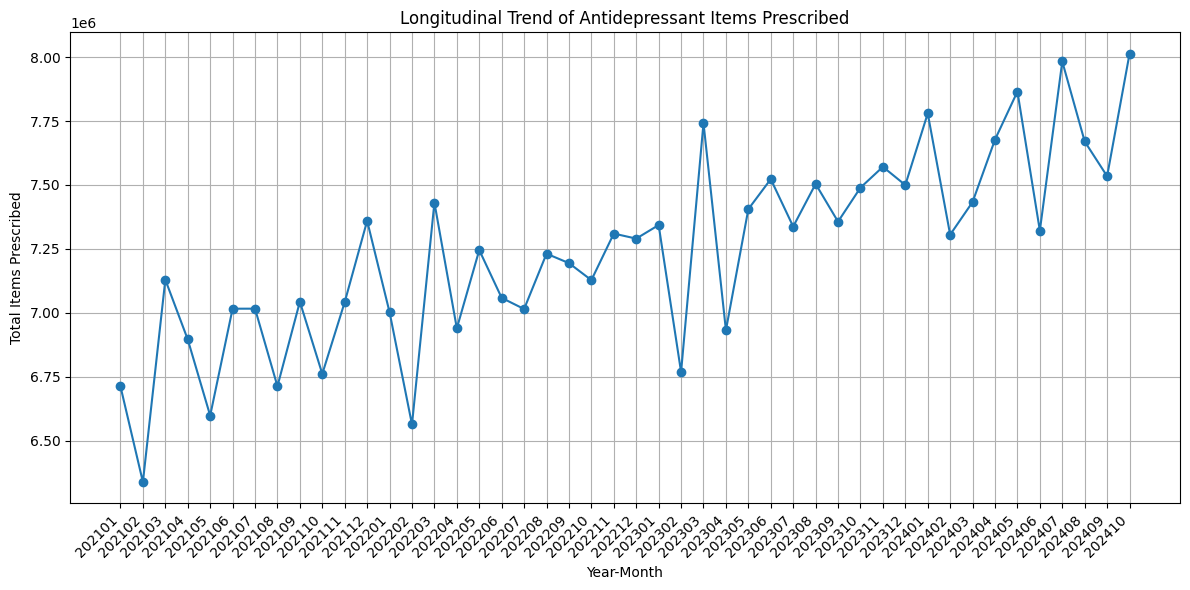

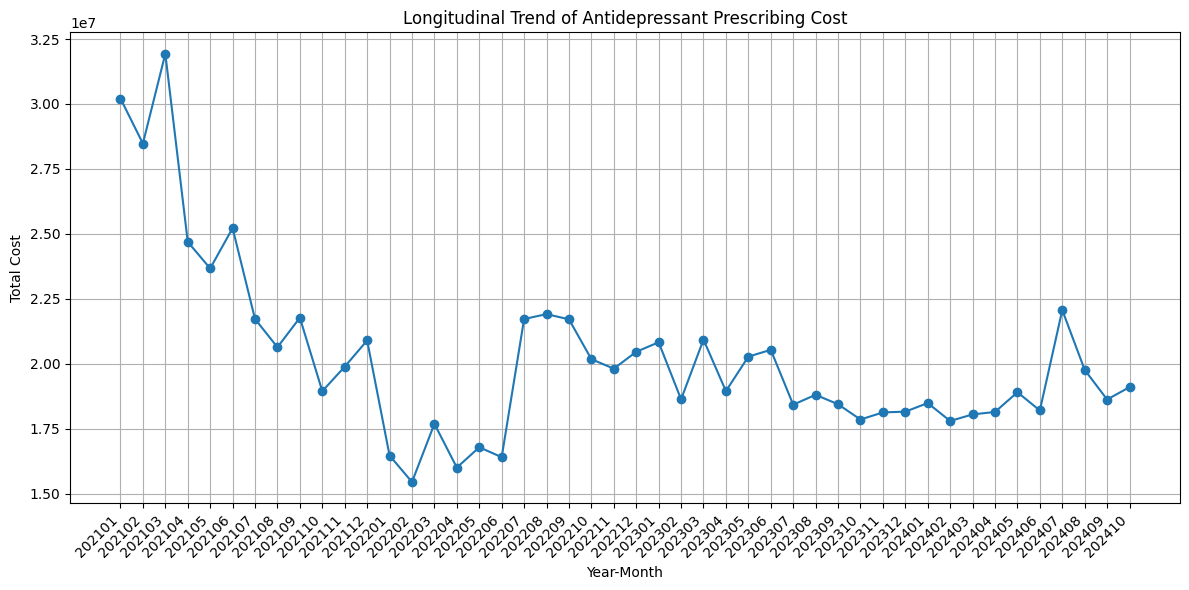

In [ ]:
ds = pca_regional_drug_summary_df[['YEAR_MONTH', 'COST', 'ITEMS']].copy()
ds['YEAR_MONTH'] = ds['YEAR_MONTH'].astype(str)

monthly_trends = ds.groupby('YEAR_MONTH', as_index=False)[['ITEMS', 'COST']].sum()

# ITEMS chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['YEAR_MONTH'], monthly_trends['ITEMS'], marker='o', linestyle='-')
plt.title('Longitudinal Trend of Antidepressant Items Prescribed')
plt.xlabel('Year-Month')
plt.ylabel('Total Items Prescribed')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# COST chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['YEAR_MONTH'], monthly_trends['COST'], marker='o', linestyle='-')
plt.title('Longitudinal Trend of Antidepressant Prescribing Cost')
plt.xlabel('Year-Month')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

The overall structure appears to follow the standard principle that the number of items prescribed is related to the overall cost.

However, there seems to be an influential factor in these oscillations that has caught my attention.

From January to March of 2021, there is a significant decline in the number of prescriptions, with March recording the lowest national figure for items prescribed. Surprisingly, that same period corresponds to where the cost has hit its highest.

It is curious that February consistently shows a marked drop in prescription numbers, only for an exponential surge in March to be followed by another significant fall in April.

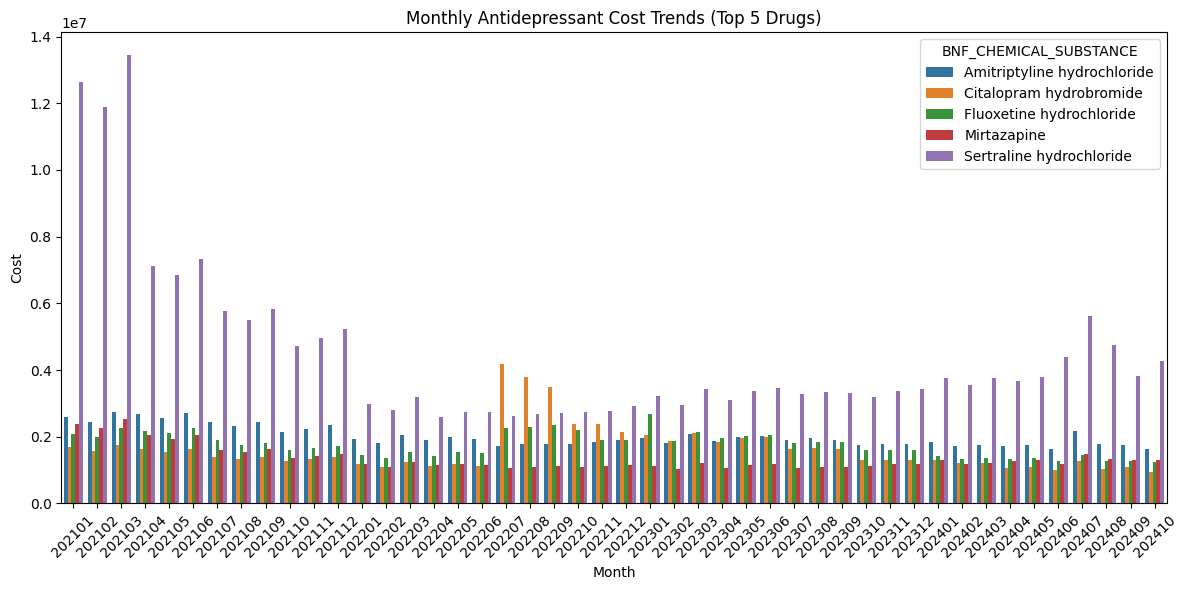

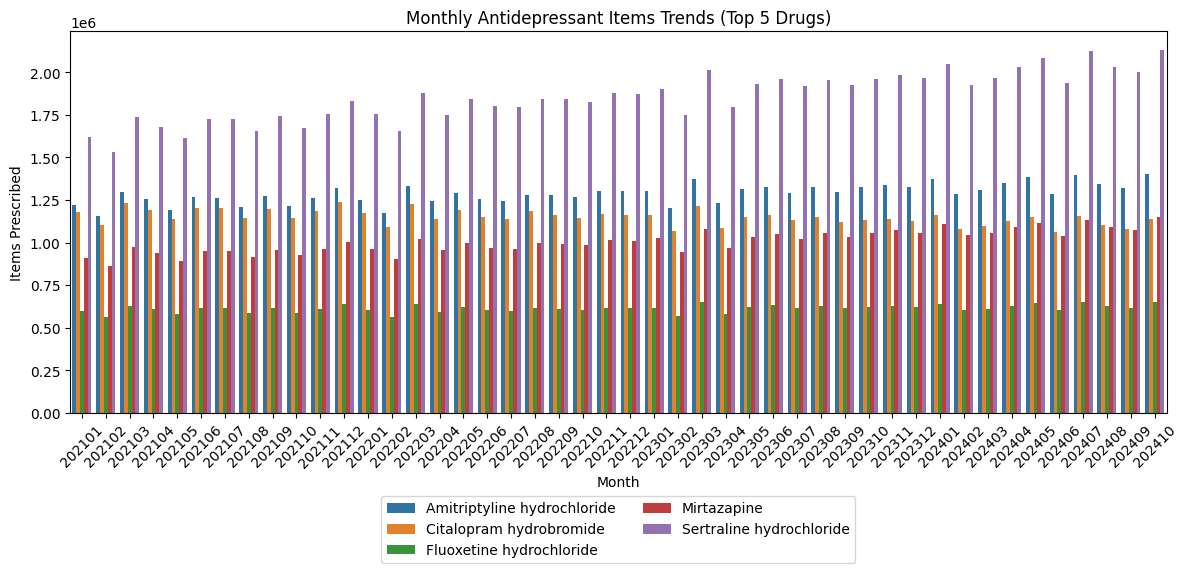

In [ ]:
top5_drugs = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index
ds = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].isin(top5_drugs)].copy()
ds['YEAR_MONTH'] = ds['YEAR_MONTH'].astype(str)

monthly_items = ds.groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'], as_index=False)['ITEMS'].sum()
monthly_cost = ds.groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'], as_index=False)['COST'].sum()

# monthly cost
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_cost, x='YEAR_MONTH', y='COST', hue='BNF_CHEMICAL_SUBSTANCE')
plt.xticks(rotation=45)
plt.title("Monthly Antidepressant Cost Trends (Top 5 Drugs)")
plt.xlabel("Month")
plt.ylabel("Cost")
plt.tight_layout()
plt.show()

# monthly items
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_items, x='YEAR_MONTH', y='ITEMS', hue='BNF_CHEMICAL_SUBSTANCE')
plt.xticks(rotation=45)
plt.title("Monthly Antidepressant Items Trends (Top 5 Drugs)")
plt.xlabel("Month")
plt.ylabel("Items Prescribed")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.tight_layout()
plt.show()

Comparing the top five most prescribed drugs reveals that Sertraline stands out as the most frequently dispensed antidepressant. Examining the numbers of items prescribed, the overall trend follows the same curve as the associated costs; however, some interesting discrepancies provide insight into why the annual prescribing cost of 2022 fell even as the number of items increased.

In March 2021, the cost of Sertraline was reduced to nearly half, with a subsequent significant drop in July of the same year. Then, in January 2022, the cost declined by about one-third compared to January 2021. Remarkably, these substantial cost reductions occurred without corresponding decreases in the number of items prescribed. This consistency in volume suggests that the cost per prescription of Sertraline has itself declined rather than any change in prescribing behaviour.

Given that Sertraline is the most prescribed antidepressant, its price reduction has a notable influence on the overall cost trends. The data strongly indicate that, despite the stable or even increasing prescription volumes, the lower unit cost of Sertraline drove a decrease in the overall annual prescription cost in 2022.

In contrast, July of 2022 experienced a striking surge in the cost of Citalopram, with expenses more than doubling, even though the number of prescriptions stayed consistent. After this temporary spike, the cost of Citalopram gradually declined until it returned to its normal levels.

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



To further analyse the costs, I will now shift the focus on the antidepressants that have stand out from the above trends, *Sertraline* and *Citalopram*.

Citalopram is a curious case because—aside from the mysterious spike observed in its trend—it is the third most prescribed antidepressant while also being the lowest cost item.

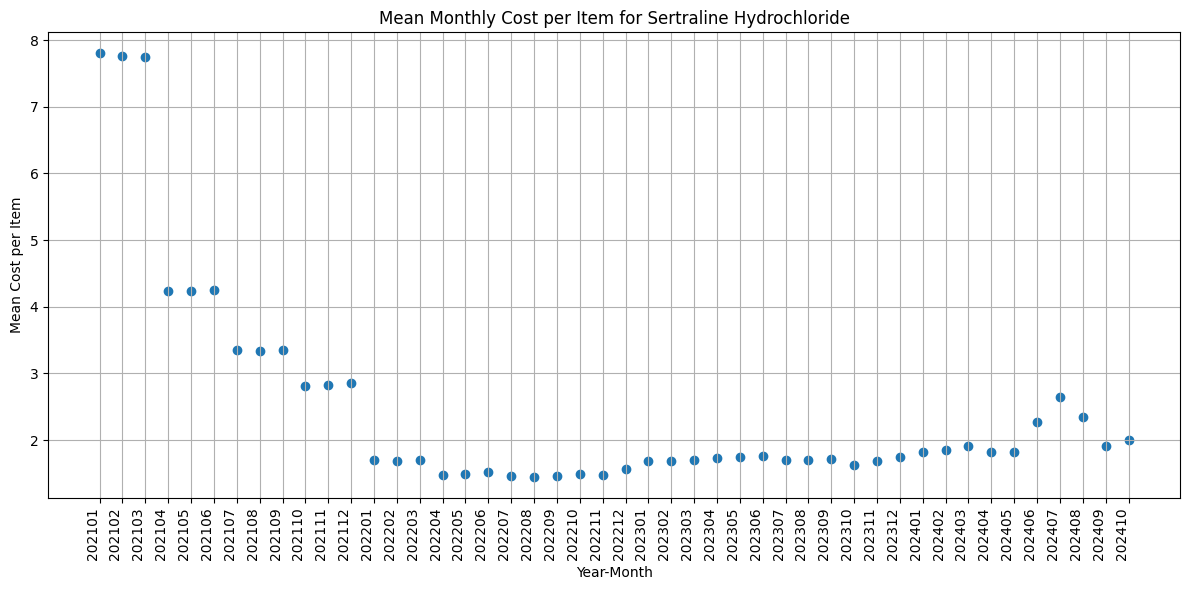

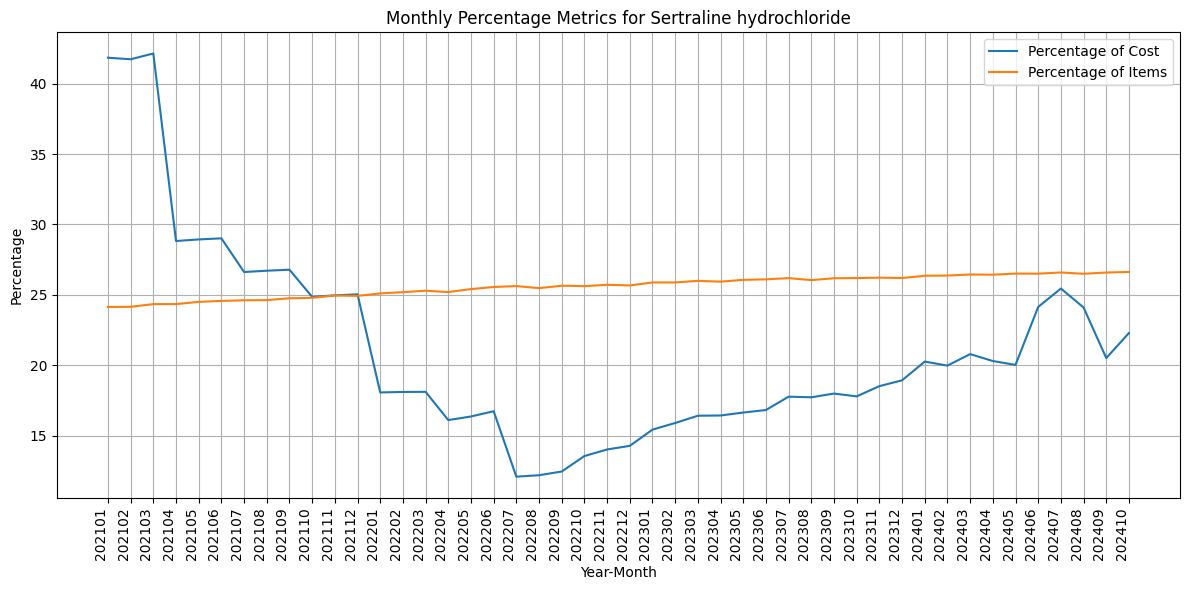

In [ ]:
sertaline_df = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride'
]

sertaline_monthly = sertaline_df.groupby('YEAR_MONTH', as_index=False).sum()
sertaline_monthly['MEAN_COST_PER_ITEM'] = sertaline_monthly['COST'] / sertaline_monthly['ITEMS']

all_monthly = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False).sum()

monthly_combined = pd.merge(
    sertaline_monthly,
    all_monthly[['YEAR_MONTH', 'COST', 'ITEMS']],
    on='YEAR_MONTH',
    suffixes=('', '_ALL')
)
monthly_combined['YEAR_MONTH'] = monthly_combined['YEAR_MONTH'].astype(str)
monthly_combined['PERCENT_COST'] = (monthly_combined['COST'] / monthly_combined['COST_ALL']) * 100
monthly_combined['PERCENT_ITEMS'] = (monthly_combined['ITEMS'] / monthly_combined['ITEMS_ALL']) * 100

# mean monthly cost per item
plt.figure(figsize=(12, 6))
plt.scatter(monthly_combined['YEAR_MONTH'],
            monthly_combined['MEAN_COST_PER_ITEM'],
            )
plt.title('Mean Monthly Cost per Item for Sertraline Hydrochloride')
plt.xlabel('Year-Month')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Mean Cost per Item')
plt.grid(True)
plt.tight_layout()
plt.show()

# percentages
plt.figure(figsize=(12, 6))
plt.plot(monthly_combined['YEAR_MONTH'], monthly_combined['PERCENT_COST'], label='Percentage of Cost')
plt.plot(monthly_combined['YEAR_MONTH'], monthly_combined['PERCENT_ITEMS'], label='Percentage of Items')
plt.title('Monthly Percentage Metrics for Sertraline hydrochloride')
plt.xlabel('Year-Month')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

It is evident that the cost of Sertraline has played a major role in the overall reduction of costs from the year 2021 to 2022. The mean monthly cost graph demonstrates that, by January 2022, the cost of this drug had decreased by approximately 75% compared to its level in the previous year.

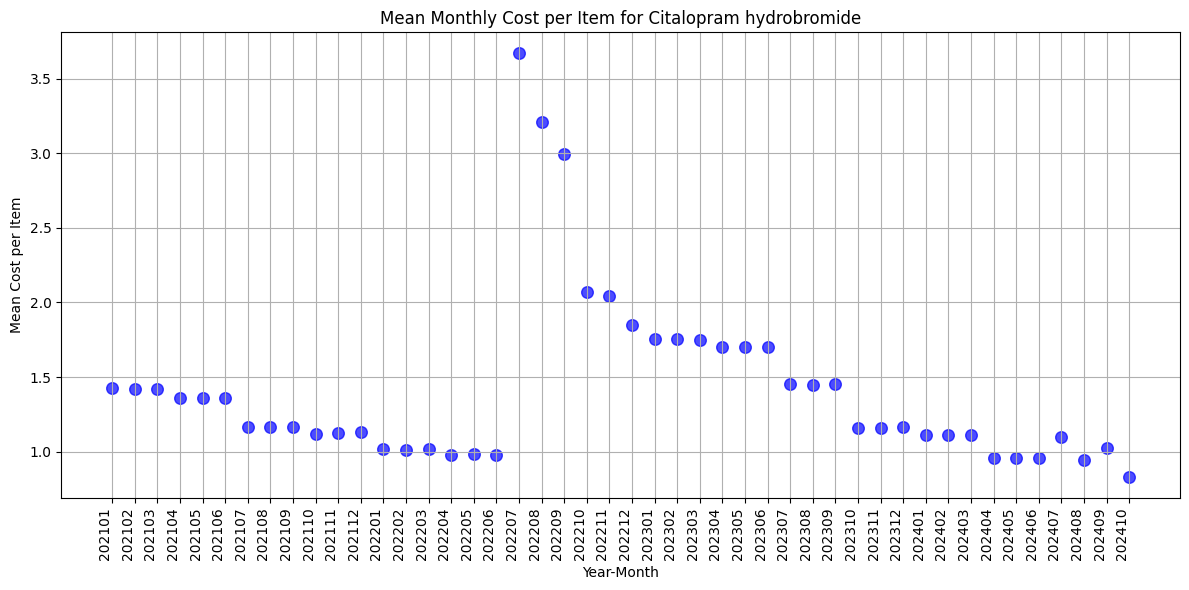

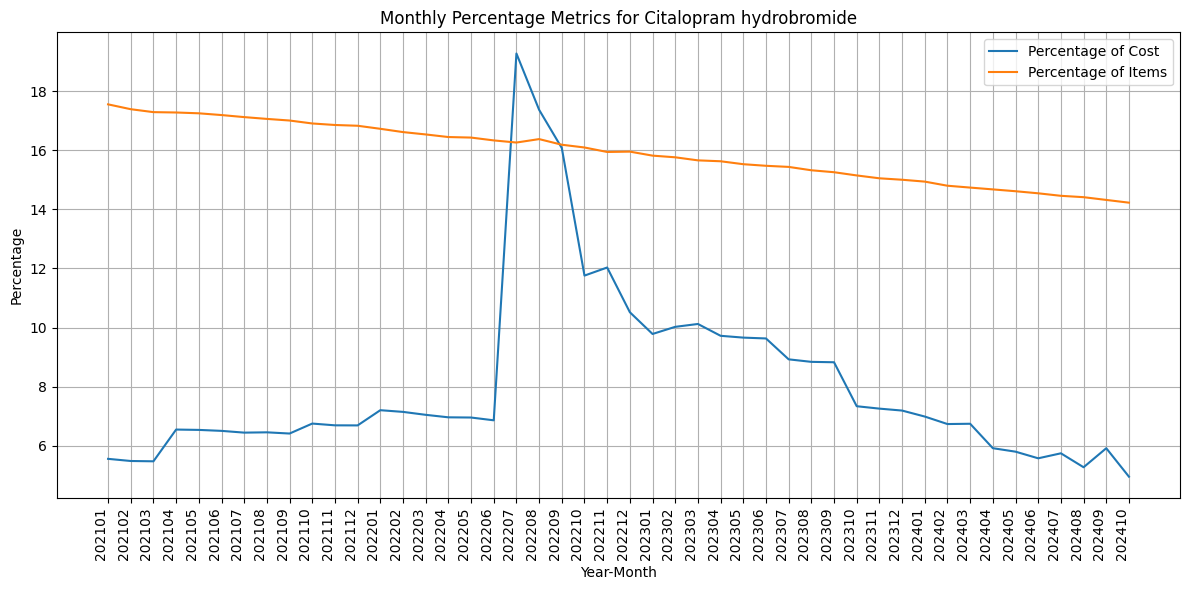

In [ ]:
drug = 'Citalopram hydrobromide'

def compute_monthly_metrics(df, drug):
    """
    Filter the DataFrame for the given drug and compute monthly totals
    along with the mean cost per item.
    """
    drug_df = df[df['BNF_CHEMICAL_SUBSTANCE'] == drug]
    monthly = drug_df.groupby('YEAR_MONTH', as_index=False).sum()
    monthly['MEAN_COST_PER_ITEM'] = monthly['COST'] / monthly['ITEMS']
    return monthly

citalopram_monthly = compute_monthly_metrics(pca_regional_drug_summary_df, drug)
all_monthly = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False).sum()

# Merge the drug-specific monthly aggregates with overall metrics
monthly_combined = pd.merge(
    citalopram_monthly,
    all_monthly[['YEAR_MONTH', 'COST', 'ITEMS']],
    on='YEAR_MONTH',
    suffixes=('', '_ALL')
)

monthly_combined['YEAR_MONTH'] = monthly_combined['YEAR_MONTH'].astype(str)
monthly_combined['PERCENT_COST'] = (monthly_combined['COST'] / monthly_combined['COST_ALL']) * 100
monthly_combined['PERCENT_ITEMS'] = (monthly_combined['ITEMS'] / monthly_combined['ITEMS_ALL']) * 100

# --- Scatter Plot: Mean Monthly Cost per Item ---
plt.figure(figsize=(12, 6))
plt.scatter(
    monthly_combined['YEAR_MONTH'],
    monthly_combined['MEAN_COST_PER_ITEM'],
    color='blue', alpha=0.7, s=70
)
plt.title(f'Mean Monthly Cost per Item for {drug}')
plt.xlabel('Year-Month')
plt.ylabel('Mean Cost per Item')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Line Plot: Monthly Percentage Metrics ---
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_combined['YEAR_MONTH'],
    monthly_combined['PERCENT_COST'],
    label='Percentage of Cost'
)
plt.plot(
    monthly_combined['YEAR_MONTH'],
    monthly_combined['PERCENT_ITEMS'],
    label='Percentage of Items'
)
plt.title(f'Monthly Percentage Metrics for {drug}')
plt.xlabel('Year-Month')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# dataset for 2021 COUNT
top10_2021_count = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2021].groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False).head(10)
top10_2021_count['YEAR'] = 2021

# dataset for 2022 COUNT
top10_2022_count = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2022].groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False).head(10)
top10_2022_count['YEAR'] = 2022

top10_combined_count = pd.concat([top10_2021_count, top10_2022_count], ignore_index=True)

# dataset for 2021 COST
top10_2021_cost = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2021].groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum().sort_values(by='COST', ascending=False).head(10)
top10_2021_cost['YEAR'] = 2021

# dataset for 2022 COST
top10_2022_cost = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2022].groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum().sort_values(by='COST', ascending=False).head(10)
top10_2022_cost['YEAR'] = 2022

top10_combined_cost = pd.concat([top10_2021_cost, top10_2022_cost], ignore_index=True)

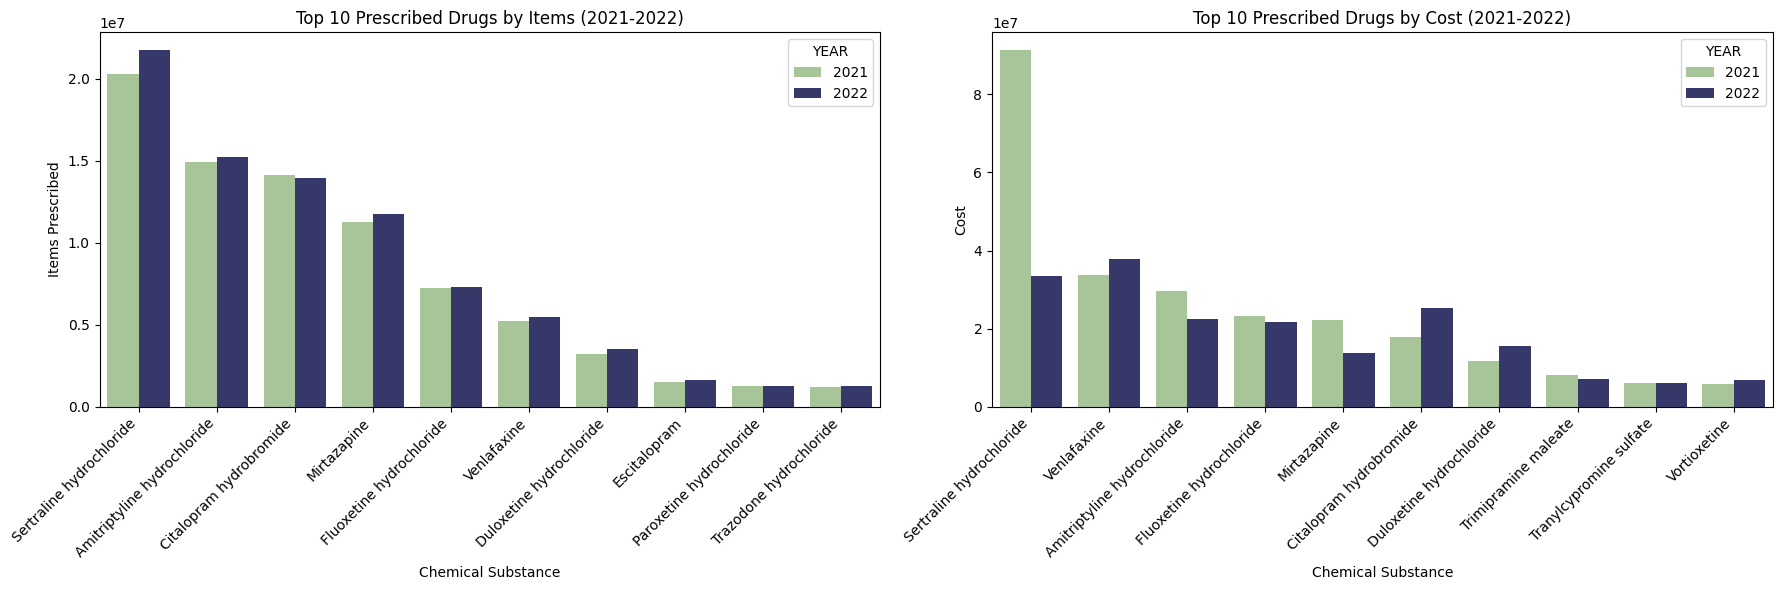

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Items prescribed
sns.barplot(
    data=top10_combined_count,
    x="BNF_CHEMICAL_SUBSTANCE", y="ITEMS", hue="YEAR",
    ax=axes[0], palette="crest"
)
axes[0].set_title("Top 10 Prescribed Drugs by Items (2021-2022)")
axes[0].set_xlabel("Chemical Substance")
axes[0].set_ylabel("Items Prescribed")
axes[0].set_xticks(axes[0].get_xticks())

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Cost of prescriptions
sns.barplot(
    data=top10_combined_cost,
    x="BNF_CHEMICAL_SUBSTANCE", y="COST", hue="YEAR",
    ax=axes[1], palette="crest"
)
axes[1].set_title("Top 10 Prescribed Drugs by Cost (2021-2022)")
axes[1].set_xlabel("Chemical Substance")
axes[1].set_ylabel("Cost")
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Looking at the data from the top 10 most prescribed antidepressants across 2021 and 2022, the overall volume of prescriptions has mostly risen. Notably, the number of prescriptions for Sertraline has seen a particularly significant increase during this period.

When comparing the cost trends, there is a substantial decline in the cost of Sertraline, as evidenced by the previous graphs. In comparison, other drugs—such as Amitriptyline and Mirtazapine—also experienced moderate cost reductions, while Fluoxetine and Trimipramine exhibited only slight decreases.

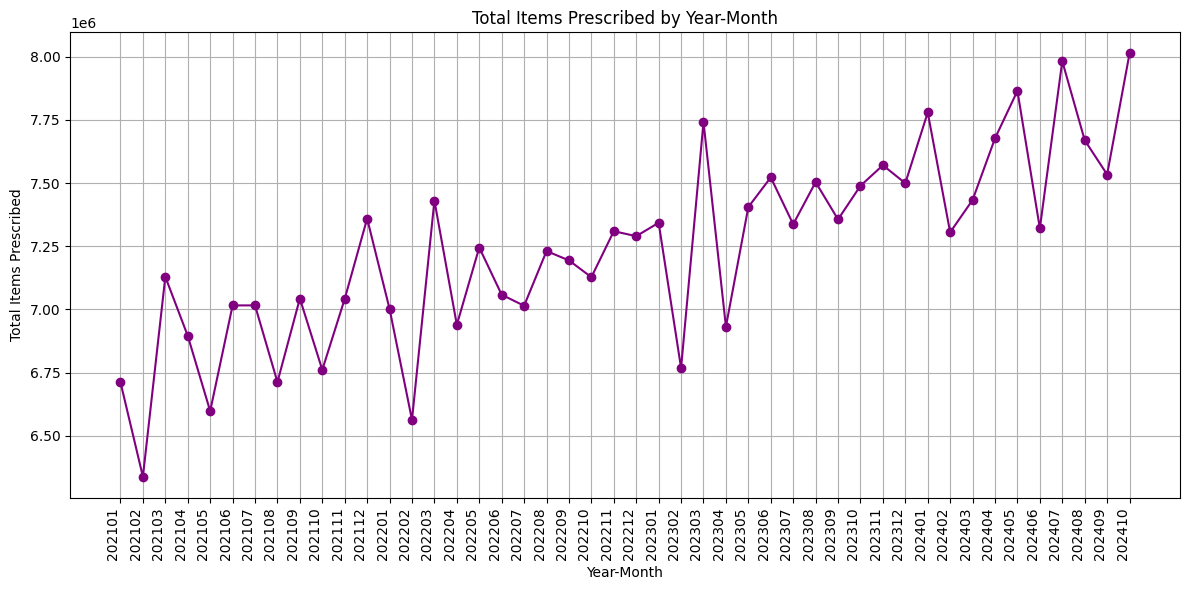

In [ ]:
monthly_items = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['ITEMS'].sum()

monthly_items['YEAR_MONTH'] = monthly_items['YEAR_MONTH'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_items['YEAR_MONTH'], monthly_items['ITEMS'], marker='o', color='purple')
plt.title('Total Items Prescribed by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Items Prescribed')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


The analysis of national monthly prescribing data for 2021 and 2022 has revealed several critical dynamics influencing overall cost trends.

Notably, February 2021 emerged as a turning point where prescription volumes experienced a sharp decline, only to rebound dramatically in March. Coinciding with this pattern, the cost of Sertraline was observed to have halved in the month following the drop in prescription numbers. This consistent trend — an exponential decline in prescriptions during February followed by a rapid rise in March — suggests that there could be an underlying seasonal or operational factor affecting the prescribing behaviours.

The Annual Summary Statistics of National Monthly Prescribing Cost for 2021 further underscore these dynamics. The box plot analysis shows that the mean cost lies outside the interquartile range, highlighting a significant skew in the distribution. This skewness, driven by extreme cost values, provides a clear explanation for why the overall costs for 2021 were disproportionately high compared to other periods.

While prescription volumes have generally increased over time, the substantial reduction in overall annual costs is primarily driven by significant reductions in unit costs — particularly for Sertraline. Given that Sertraline consistently ranks as the most frequently dispensed antidepressant, its dramatic cost reductions have played a crucial role in shaping the national cost landscape.

In 2024, the total count of items prescribed exhibits substantial volatility. When examining the total items prescribed by year and month, several pronounced exponential falls and rises are evident. This erratic behavior has resulted in overall annual prescribing counts falling below those observed in previous years.